`Name`: Ahmed Mosaad Gelwan <br>
`Student ID`: 20191020

# IRIS Clustering and Classification

In this notebook I will use Iris dataset to cluster diffrent iris types and then using KNN to compare the value from clustering

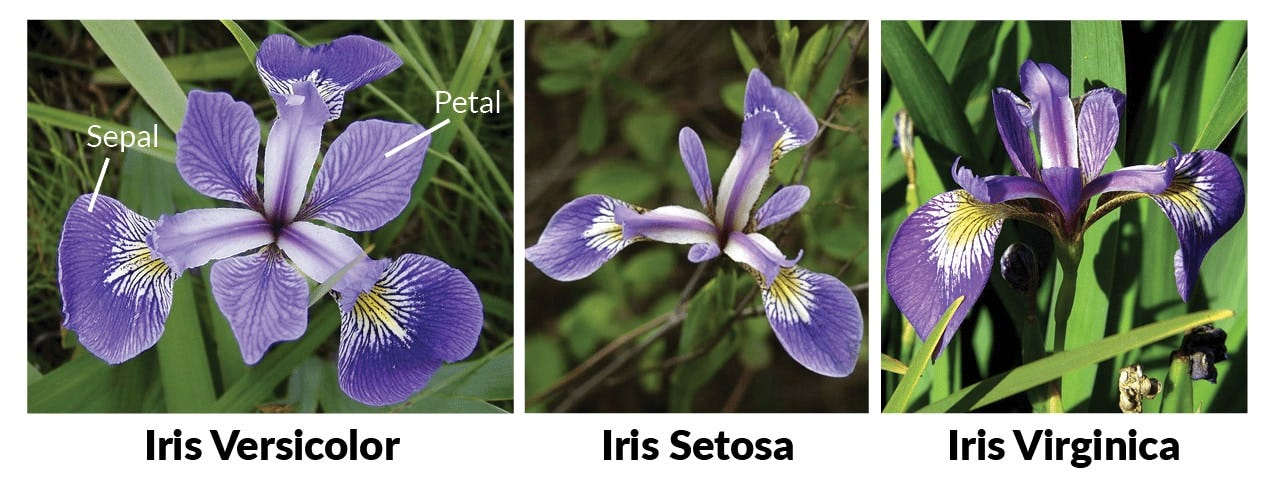

## Import Reqired Libaraies For Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8-deep')

## Import Data

In [5]:
df = pd.read_csv('iris.csv', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


*Hence this data has not the header so we searched about it and find the identical data set and labeled as:*
- `sepal_length`: sepal length in cm
- `sepal_width`: sepal width in cm
- `petal_length`: petal length in cm
- `petal_width`: petal width in cm
- `class`: class value of the row


In [6]:
df.columns = ['sepal_length','sepal_width',	'petal_length',	'petal_width','class']

In [7]:
df.shape

(150, 5)

*There is 150 rows for 5 variables (4 features and traget varaibale)*

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


*All Data Types are correct and there is no any missing value.*

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [10]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

*There is no missing values*

In [11]:
df.duplicated().sum()

3

*There 3 duplicated rows so we will drop them*

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(147, 5)

*3 duplicated rows are removed*

**To ensure that the dataset is blanced**

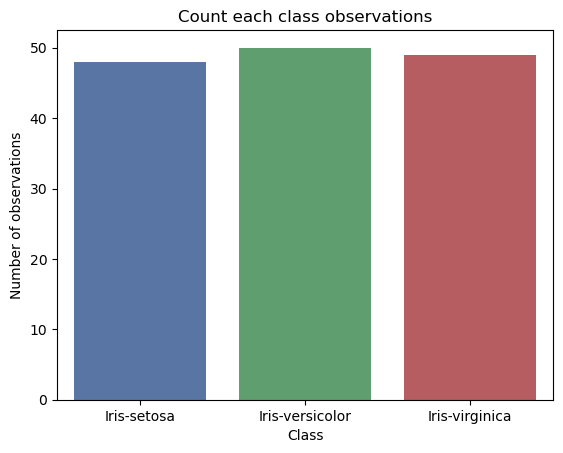

In [14]:
sns.countplot(x=df['class'])
plt.xlabel('Class')
plt.ylabel('Number of observations')
plt.title('Count each class observations')
plt.show()

*We find that this dataset is balenced between diffrent classes i.e. there is no bais to a specific class. (:*

## Distributions of Features

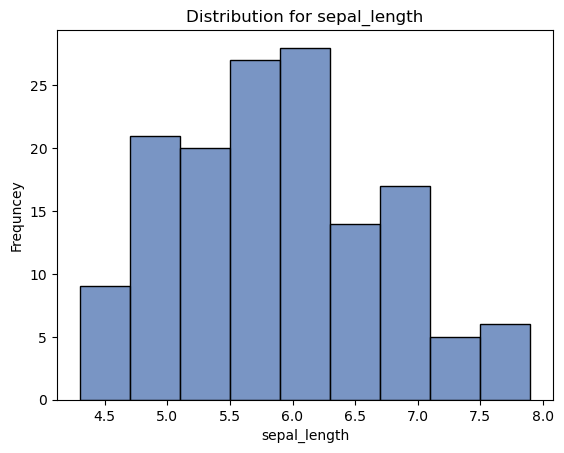

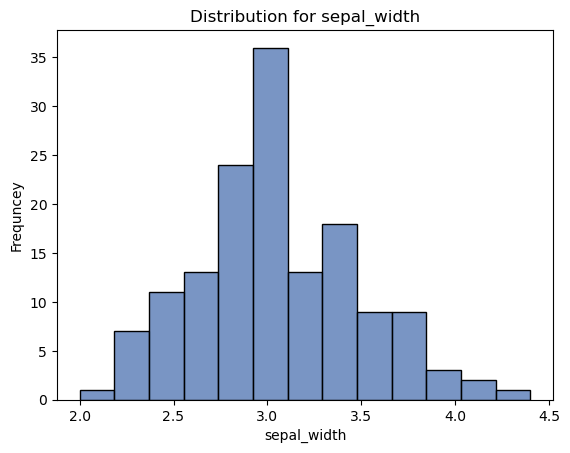

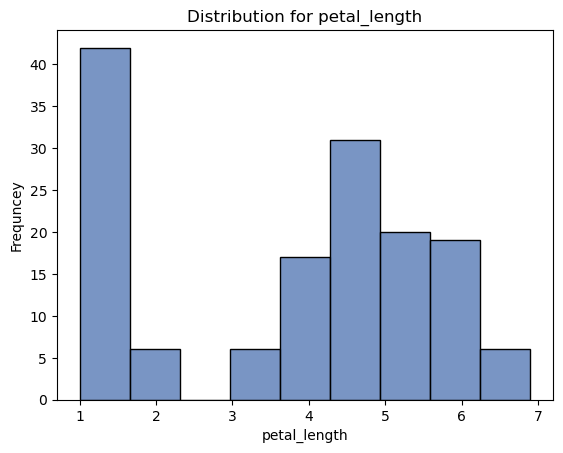

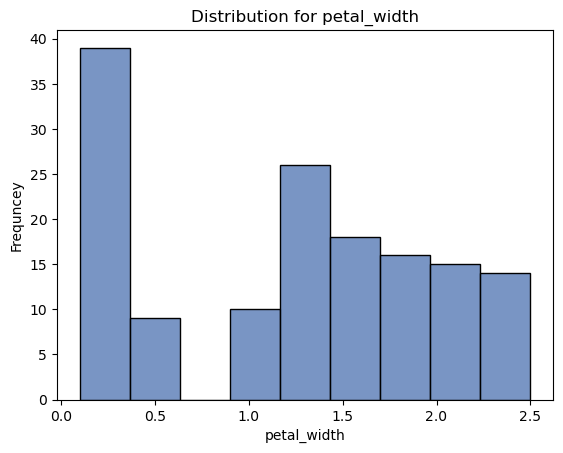

In [15]:
for feature in df.drop(columns='class'):
    sns.histplot(data=df, x=feature)
    plt.xlabel(f'{feature}')
    plt.ylabel('Frequncey')
    plt.title(f'Distribution for {feature}')
    plt.show()

**We can say that both `petal_length` and `petal_width` are divided into 2 groups i.e. they may be two classes has the near by values <br> `sepal width` is about to be normally distributed <br> `sepal length` is skwed**

### Outlier Anaysis

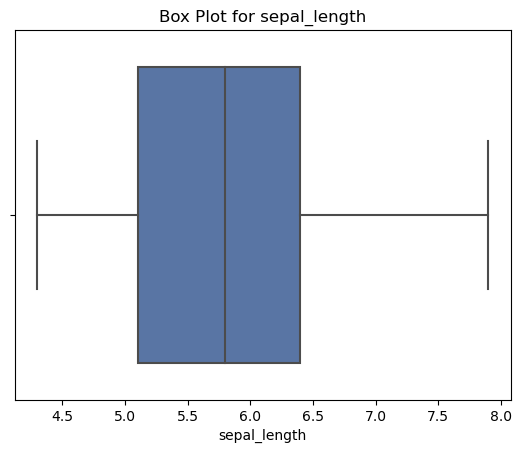

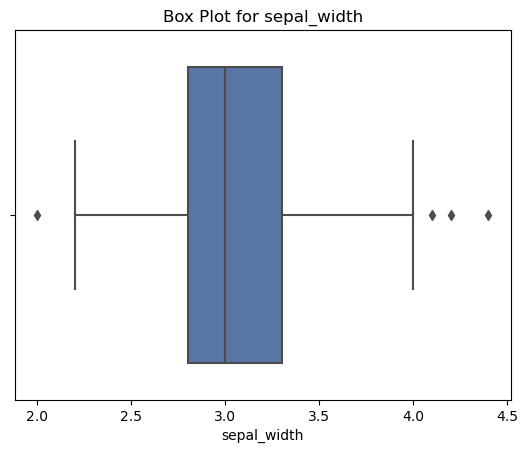

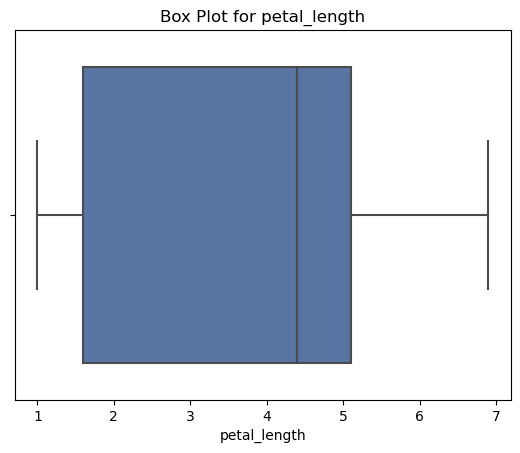

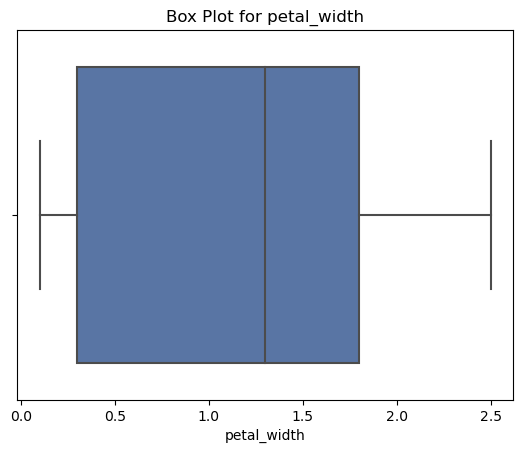

In [17]:
for feature in df.drop(columns='class'):
    sns.boxplot(x=df[feature])
    plt.title(f'Box Plot for {feature}')
    plt.show()

*We can say that there is outliers in `sepal_width` so we will remove them*

In [18]:
lower , upper = df['sepal_width'].quantile([0.02,0.98]).to_list()
df = df[df['sepal_width'].between(lower,upper)]

<Axes: xlabel='sepal_width'>

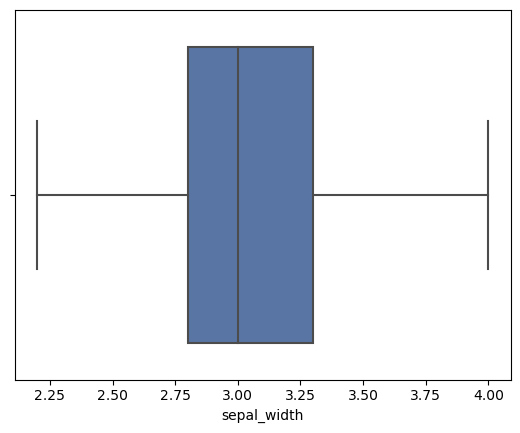

In [22]:
sns.boxplot(x=df['sepal_width'])

*So we removed outliers*

### Is there a corelation bettwen variables in each class?

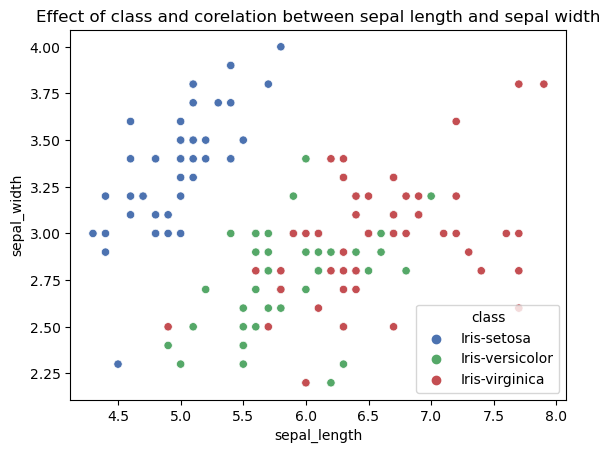

In [24]:
sns.scatterplot(data=df, x='sepal_length',y='sepal_width', hue='class')
plt.title('Effect of class and corelation between sepal length and sepal width');

**We can deduce that `sepal_length` and `sepal_width` can not help us to cluster these data points becouse there is overlap between `versicolor` and `virhinica`**

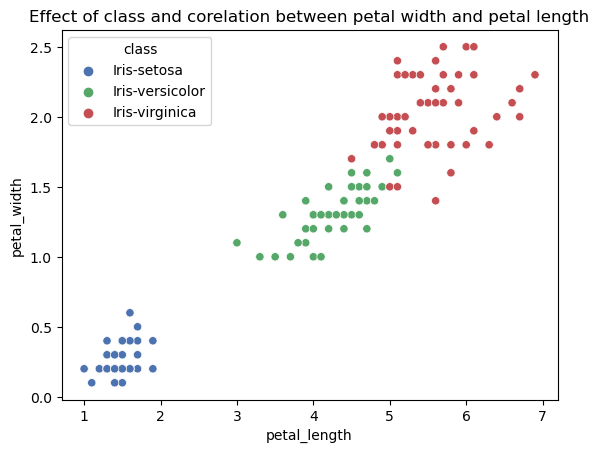

In [25]:
sns.scatterplot(data=df, x='petal_length',y='petal_width', hue='class')
plt.title('Effect of class and corelation between petal width and petal length');

**We can deduce that `petal_length`  and `petal_width` can  help us to cluster these data points however ther is a tiny overlap `versicolor` and `virhinica`**

### Corelation between fearures

In [26]:
corealtion = df.drop(columns='class').corr()
corealtion

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.113268,0.879015,0.821715
sepal_width,-0.113268,1.000000,-0.396539,-0.328102
petal_length,0.879015,-0.396539,1.000000,0.960785
petal_width,0.821715,-0.328102,0.960785,1.000000


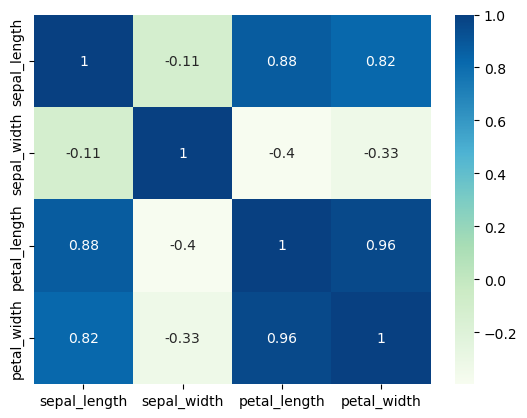

In [27]:
sns.heatmap(corealtion, annot=True, cmap='GnBu');

*Hene `spepal_length` and `petal_length` have the strong corealtionship we will drop `spepal_length` becouse it will not help us clustering the data*

In [28]:
df.drop(columns=['sepal_length'], inplace=True)

## Splitting Data

In [29]:
target = 'class'
X = df.drop(columns=target)
y = df[target]

## Model Building
### K-Means 

**Choosing K:**
We will choose K=3 because will we cluster into 3 grups 

In [30]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

We will use pipline to make model training easier and `make_pipline` automatically put names for each given class.

In [35]:
k_means = make_pipeline(
    MinMaxScaler(),
    KMeans(n_clusters=3, random_state=42)
)

### Model trainig

In [37]:
k_means.fit(X)

/home/ahmed/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('kmeans', KMeans(n_clusters=3, random_state=42))])

- Extracting `labels`: which are the cluster groups
- Extracting `centeroids`: which are center points of cluster

In [38]:
labels = k_means.named_steps['kmeans'].labels_
centroids = k_means.named_steps['kmeans'].cluster_centers_

**Now lets plot the above classified plot using petal width and petal length and include centroids**

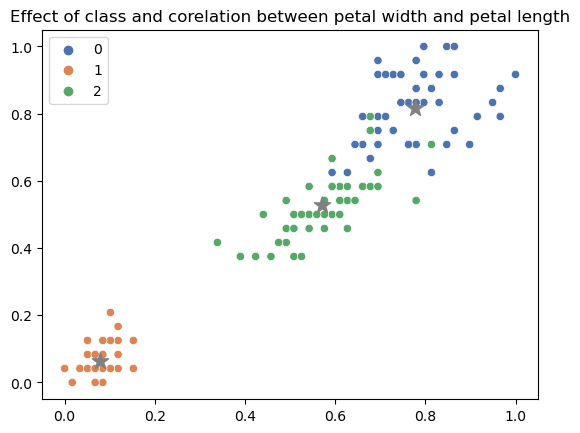

In [39]:
X_transformed = k_means.named_steps['minmaxscaler'].fit_transform(X)
sns.scatterplot(x=X_transformed[:,1],y=X_transformed[:,2], hue=labels, palette='deep')
plt.scatter(x=centroids[:,1], y=centroids[:,2], color='gray',marker='*',s=150)
plt.title('Effect of class and corelation between petal width and petal length');

**Error in model**

In [40]:
k_means.named_steps['kmeans'].inertia_

5.5775982963497

*Okay it is not large*

### Plot all diminsions in 2D scatter plot using PCA

In this step we transform our X from 3D to 2D using PCA(Principle Compement Analysis) to make cluster easy for visulization

In [44]:
from sklearn.decomposition import PCA

pca= PCA(n_components=2)
X_pca = pca.fit_transform(X)


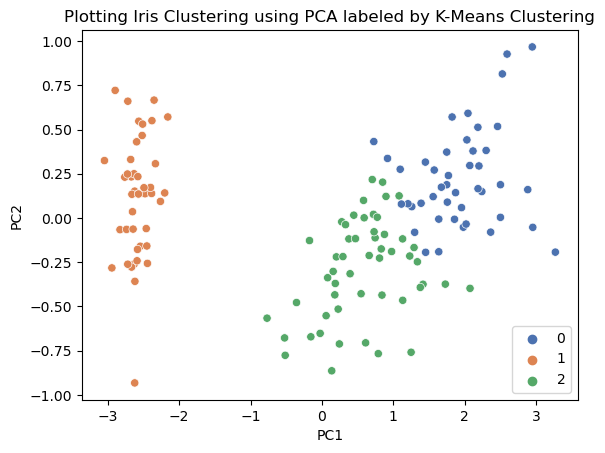

In [45]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=labels, palette='deep')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Plotting Iris Clustering using PCA labeled by K-Means Clustering");

*Now We have built the clustering model lets build a classification model using KNN to use it to annotat data and compare each output*

### Building KNN Model

In [55]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report, confusion_matrix, make_scorer

In [49]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)

*We have use label encoder to encode each class to be valid with the model*

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

*Splitting our data to %80 for trainning and %20 for testing and give random_state value to split in same way any time run the code and make spliting blanced to each class*

In [52]:
knn = make_pipeline(
    MinMaxScaler(),
    KNeighborsClassifier(n_neighbors=3)
)

- We choose `MinMaxScaler` becouse we are dealing with length and width which is must be positive
- Instantiate KNN with n=3 for insatantiation only and we will perform hyperparmeter tuning using grid search

In [54]:
# Define the parameter grid with the hyperparameters and their values to search
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
}

In [58]:
# Create the GridSearchCV object with the pipeline and parameter grid
grid_search = GridSearchCV(knn, param_grid, scoring='accuracy', cv=5)

# Fit the GridSearchCV object on the data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier(n_neighbors=3))]),
             param_grid={'kneighborsclassifier__n_neighbors': [3, 5, 7, 9],
                         'kneighborsclassifier__weights': ['uniform',
                                                           'distance']},
             scoring='accuracy')

In [59]:
# Get the best hyperparameters found by grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'uniform'}


In [60]:
# Get the best model found by grid search
best_knn = grid_search.best_estimator_

#### Model Evaliuation

In [62]:
y_train_pred = best_knn.predict(X_train)
y_train_pred[:5]

array([1, 0, 2, 0, 0])

In [63]:
accuracy_score(y_train, y_train_pred)

0.9736842105263158

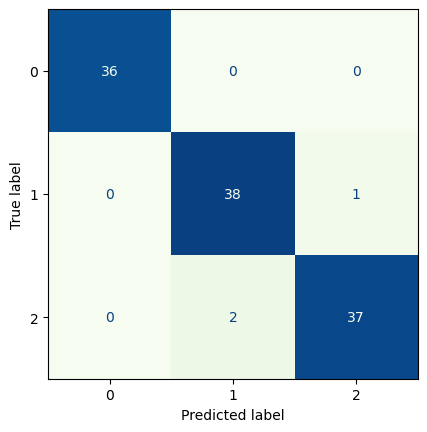

In [64]:
ConfusionMatrixDisplay.from_estimator(knn,X_train, y_train, colorbar=False, cmap='GnBu');

we find that this model make 3 False predictions only

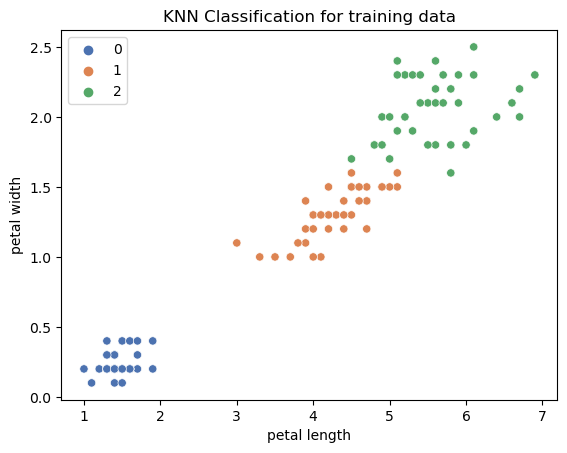

In [67]:
# Create a scatter plot of the data points colored by labels
sns.scatterplot(x=X_train['petal_length'],y=X_train['petal_width'], hue=y_train_pred, palette='deep')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('KNN Classification for training data')
plt.show()


#### Make predictions

In [68]:
y_test_pred = knn.predict(X_test)

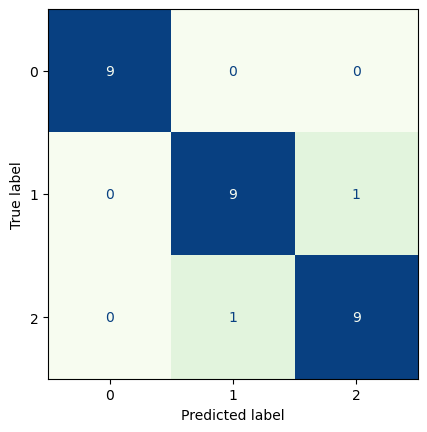

In [70]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred, colorbar=False, cmap='GnBu');


In [71]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



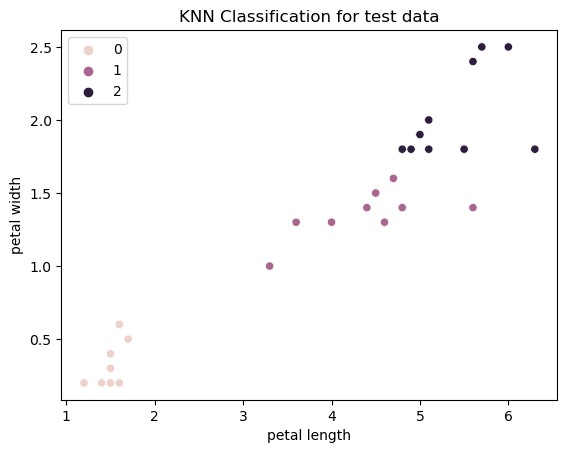

In [73]:
# Create a scatter plot of the data points colored by labels for testing data
sns.scatterplot(x=X_test['petal_length'], y=X_test['petal_width'],hue=y_test_pred)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('KNN Classification for test data')
plt.show()

Now lets annotat our clusters but first lets plot hole data in 2D using data we get by PCA

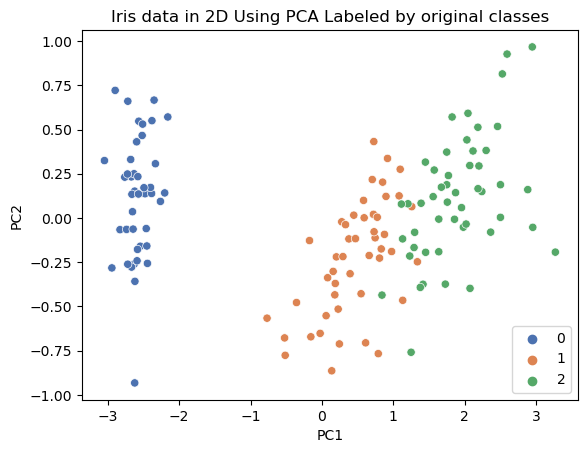

In [77]:
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1],hue=y, palette='deep')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Iris data in 2D Using PCA Labeled by original classes')
plt.show()

So we can annotat cluster Using KNN
`Cluster Number` | `Class`
--- | ---
0 | virginica
1 | setosa
2 | versicolor

## Saving Trained Models

In [173]:
import pickle

# Save the K-means model
with open('k_means.pkl', 'wb') as kmeans_file:
    pickle.dump(k_means, kmeans_file)

# Save the KNN model
with open('knn.pkl', 'wb') as knn_file:
    pickle.dump(knn, knn_file)
